<a href="https://colab.research.google.com/github/Ruhit43/ML--Depression-Prediction/blob/main/Depression_Prediction_using_different_ML_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 01**

**Q1(a)**

SVC, LogisticRegression, and DecisionTreeClassifier have been chosen as the basis models during the modeling phase. In this instance, the DecisionTreeClassifier's criteria are gini and entropy. The logistic regression portion allows for up to 10,000 iterations. SVC has karnel functions that are linear, radial, sigmoid, and polynomial. A linear decision boundary is produced by the simplest Karnel function, which is linear. On the other hand, a nonlinear decision boundary is produced by the radial basis function. The production of Sigmoid and Polynomial functions is comparable to that of Sigmoid and Polynomial Karnels.

1. The decision tree classifier is a machine learning technique that bases choices on input data on a tree-like structure. The tree is built by dividing the data into subsets according to the feature that offers the greatest information gain or entropy reduction.

* Entropy is a metric for a dataset's impurity or randomness. It is used to gauge how evenly the classes are distributed within a node, or its homogeneity.
* Gini is a measurement of the likelihood that a randomly selected element from a set would be erroneously classified if it were labeled at random.

2. Based on a collection of input features, the supervised learning technique known as logistic regression estimates the likelihood of a binary result (such as a yes/no or true/false decision). It is frequently applied to binary classification issues including spam filtering, fraud detection, and medical diagnosis.

3. Backing Different kinds of kernel functions can be used by the Vector Classifier (SVC) to describe non-linear decision boundaries. Several frequently used kernel functions include: The simplest kernel function that establishes a linear decision boundary between the classes is the linear kernel. Large datasets and linearly separable data are both ideal for it.
* Polynomial Kernel: By converting the data into a higher dimensional space using polynomial functions, this kernel function enables SVC to model non-linear decision boundaries. A hyperparameter that can be adjusted to manage the decision boundary's complexity is the polynomial function's degree.

* Gaussian (RBF) Kernel: This kernel function converts the data into an infinite-dimensional space using a Gaussian function, producing a non-linear decision boundary. A hyperparameter that regulates the decision boundary's smoothness is the Gaussian function's width.

* Sigmoid Kernel: This kernel function can be used to model non-linear decision boundaries. It is based on the sigmoid function. For situations involving binary classification, it is especially helpful.

In [ ]:
from pandas import read_csv, DataFrame, concat
import pandas as pa
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler

# Base Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensemble Classifiers
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from numpy import mean, std, warnings

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from matplotlib import pyplot
import time

**Q2(b)**

In [ ]:
data=read_csv('b_depressed.csv')
data=data.drop(['Survey_id', 'no_lasting_investmen'], axis=1)
data = data.dropna(how='all')
missing_counts = data.isna().sum()
X = data.drop('depressed', axis=1)  # input
y = data['depressed']   # output
print(y.value_counts())
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

print(Counter(y_over))


0    1191
1     238
Name: depressed, dtype: int64
Counter({0: 1191, 1: 1191})


In [ ]:
normalizer=StandardScaler()
New=normalizer.fit_transform(X_over)
X_over_df=DataFrame(New)
X_over_df.columns = X_over.columns
X_over_df.head()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment
0,0.195199,0.312563,-0.539361,0.577027,0.554142,0.482007,-0.014886,-0.265374,-0.260972,-0.236496,-0.254290,-0.241343,-0.464679,-0.593835,-0.333178,-0.575734,-0.177377,-0.173715,-0.514784,-0.194101
1,-0.306014,0.312563,-0.882842,0.577027,0.039736,-0.162473,-0.014886,-0.265374,-0.260972,-0.236496,-0.254290,-0.241343,-0.464679,-0.593835,-0.333178,-0.575734,-0.177377,-0.173715,-0.514784,-0.194101
2,0.548996,0.312563,-0.951538,0.577027,0.039736,0.159767,-0.014886,-0.265374,-0.260972,-0.236496,-0.254290,-0.241343,-0.464679,-0.593835,-0.333178,-0.575734,-0.177377,-0.173715,-0.514784,-0.194101
3,0.283648,0.312563,-0.608057,0.577027,-0.474671,0.482007,-0.596177,0.918800,-0.429486,1.209023,-1.496590,0.487280,-0.464679,1.683968,-0.333178,1.736912,-0.555627,-0.768833,-0.514784,-1.163541
4,-0.527137,-3.199351,1.590223,-1.733021,0.554142,0.482007,0.566405,2.411259,-0.554485,-0.236496,2.305723,1.888535,2.152024,-0.593835,-0.333178,-0.575734,0.963894,-0.675419,1.942562,-0.584646


In [ ]:
# modeling
def load_base_models():
    models = dict()
    models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
    models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
    models['lr'] = LogisticRegression(max_iter=10000)
    models['svc_linear'] = SVC(kernel='linear')
    models['svc_rbf'] = SVC()
    models['svc_sigmoid'] = SVC(kernel='sigmoid')
    models['svc_poly'] = SVC(kernel='poly')

    return models

In [ ]:
import numpy as pd
def evaluate_model_mc_run(model, X_over_df, y_over):
  re = []
  test_sz=[0.1,0.2,0.3]
  for x in test_sz:
    for j in range(100):
      X_train,X_test,y_train,y_test = train_test_split(X_over_df,y_over,test_size= x, random_state = j)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      recal = recall_score(y_test,y_pred, average='weighted')
      re.append(recal)
      Re=pd.mean(re)
  return Re


In [ ]:
warnings.filterwarnings("ignore")
models=load_base_models()
# evaluate the models and store results
print('recall score for different base models is:')
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model_mc_run(model, X_over_df, y_over)
	results.append(scores)
	names.append(name)

	print('>%s , (%.3f)' % (name, scores))

recall score for different base models is:
>dt_ent , (0.890)
>dt_gini , (0.894)
>lr , (0.567)
>svc_linear , (0.564)
>svc_rbf , (0.752)
>svc_sigmoid , (0.450)
>svc_poly , (0.749)


**Q1(c)**

In [ ]:
# get a stacking ensemble of models
def get_stackingModels():
	# define the base models: level0 models
	level0 = list()
	level0.append(('dt_ent', DecisionTreeClassifier(criterion='entropy'))) # model A
	level0.append(('dt_gini', DecisionTreeClassifier(criterion='gini'))) # model B
	level0.append(('svc_poly', SVC(kernel='poly'))) # model C
	# define meta learner model: level 1
	level1 = DecisionTreeClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
# get a list of models to evaluate

def ensamble_models():
  models = dict()
  dt_ent =DecisionTreeClassifier(criterion='entropy')
  models['bagc'] = BaggingClassifier(base_estimator=dt_ent , n_estimators=50, max_samples=0.8, max_features=0.8)
  models['boosting'] = AdaBoostClassifier(base_estimator=dt_ent , n_estimators=10) # 10 steps
  models['stack'] =get_stackingModels()
  return models

In [ ]:
models=ensamble_models()
# evaluate the models and store results

# results, names = list(), list()
ensemble_model_df = DataFrame(columns = ['bagc', 'boosting', 'stack'])

for name, model in models.items():
  for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_over_df, y_over, test_size = 0.3, random_state = j)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ensemble_model_df.at[j, name] = recall_score(y_test, y_pred, average='weighted')

ensemble_model_df

,bagc,boosting,stack
0,0.937063,0.886713,0.883916
1,0.932867,0.881119,0.829371
2,0.94965,0.865734,0.872727
3,0.938462,0.885315,0.878322
4,0.942657,0.872727,0.839161
...,...,...,...
95,0.948252,0.875524,0.893706
96,0.93007,0.874126,0.874126
97,0.951049,0.87972,0.851748
98,0.959441,0.882517,0.874126


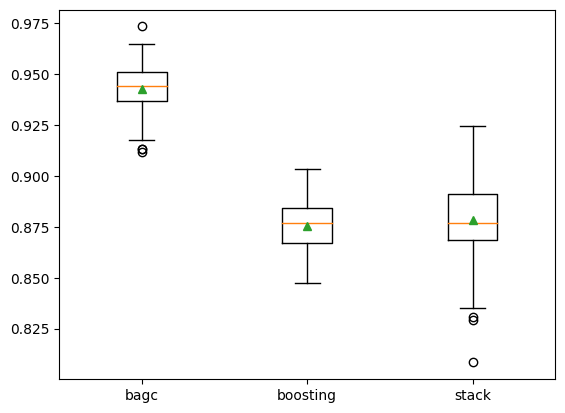

In [ ]:
pyplot.boxplot(ensemble_model_df, showmeans=True)
pyplot.xticks([1, 2, 3], ['bagc', 'boosting', 'stack'])
pyplot.show()

**Q1(d)**

Here we have found the best classifier is Decision Tree classifier('entropy'). The accuracy is high and time difference is low. Other classifiers has low accuracy and some has high time difference. Decision Tree Classifier has low ram consumption where as SVC has high ram consumption.

In [ ]:
best_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=50, max_samples=0.8, max_features=0.8)
best_model.fit(X_over_df, y_over)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_features=0.8, max_samples=0.8, n_estimators=50)

In [ ]:
input = X_over_df.iloc[[14]]
prediction = best_model.predict(input)
print('Prediction', prediction)
y_over.iloc[[14]]

Prediction [1]


14    1
Name: depressed, dtype: int64

**Question 02**

In [ ]:
X_n = data.drop('living_expenses', axis=1)  # input
y_n = data['living_expenses']   # output

In [ ]:
normalizer=StandardScaler()
NewRe=normalizer.fit_transform(X_n)
X_over_re=DataFrame(NewRe)
X_over_re.columns = X_n.columns
X_over_re.head()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,depressed
0,0.221524,0.298625,-0.484751,0.542572,0.596038,0.449205,0.017243,-0.235742,-0.237517,-0.226807,-0.251820,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.447026
1,-0.290364,0.298625,-0.842371,0.542572,0.062367,-0.235138,0.017243,-0.235742,-0.237517,-0.226807,-0.251820,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,2.237007
2,0.582857,0.298625,-0.913895,0.542572,0.062367,0.107033,0.017243,-0.235742,-0.237517,-0.226807,-0.251820,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.447026
3,0.311857,0.298625,-0.556275,0.542572,-0.471303,0.449205,-0.542764,0.950134,-0.411785,1.252338,0.478263,-0.468277,1.723208,-0.34754,1.685645,-0.588427,-0.792761,-0.520915,-1.188710,-0.447026
4,-0.516197,-3.348683,1.732492,-1.843074,0.596038,0.449205,0.577250,2.444737,-0.541053,-0.226807,1.882326,2.135489,-0.580313,-0.34754,-0.593245,0.908671,-0.699010,1.919699,-0.607845,-0.447026


In [ ]:
# get a list of regressor models to evaluate
def get_regressor_models():
	models = dict()

	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()

	return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model_kf(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>cart -19077247.036 (1869804.368)
>svm -13506044.893 (1516609.412)


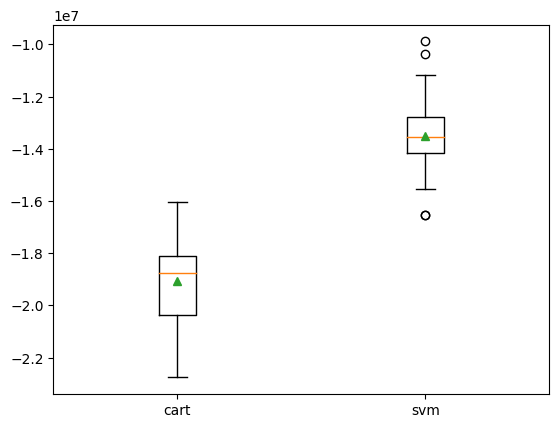

In [ ]:
# get the models to evaluate
models = get_regressor_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model_kf(model, X_over_re, y_n)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

**Question 03**

**Q3(a)**

Here i chose one column which has two classification data where i have two types of classification data. So the LDA columns will be one.

Formula of LDA, the number of classes for species-1

In [ ]:
data=read_csv('b_depressed.csv')
data=data.drop(['Survey_id', 'no_lasting_investmen'], axis=1)
data = data.dropna(how='all')
X = data.drop('depressed', axis=1)  # input
y = data['depressed']   # output
X.head()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment
0,91,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718
1,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718
2,115,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718
3,97,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123
4,42,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562


In [ ]:
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning

df=pa.DataFrame(X_lda)
df.columns=[['lda1']]
df.head()

,lda1
0,-0.474869
1,-0.299305
2,-0.315304
3,-0.290096
4,0.613479


In [ ]:
start=time. time()
acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", pd.mean(acc))  # average of accuracy to stablize the result
end = time. time()
print(end-start)

Accuracy using 100 MC run: 0.7015151515151514
2.255890130996704


In [ ]:
start=time. time()
acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", pd.mean(acc))  # average of accuracy to stablize the result
end = time. time()
print(end-start)

Accuracy using 100 MC run: 0.733100233100233
0.59586501121521


**Q3(b)**

Here we can see that the accuracy with the base input is lower than the accuracy of the input where we applied Linear Discriminant Analysis. Also the time difference is also lower that the original one. So it is clear that applying Linear Discriminant Analysis helps to get a better accuracy and reduces run time.